<a href="https://colab.research.google.com/github/BhavanaPerecharla/STUDENT-PERFORMANCE-PREDICTION-DATA-ANALYSIS-PROJECT/blob/main/Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import missingno as msno
import dask.dataframe as dd
import geopandas as gpd
import statsmodels.api as sm
from wordcloud import WordCloud

# **1. COLLECTION OF DATA AND READING THE DATA**

In [ ]:
import pandas as pd

df_performance = pd.read_csv('/content/student_performance.csv', sep=';')

print("First few rows of student-performance.csv:")
df_performance.head()


First few rows of student-performance.csv:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


**SHAPE OF THE DATA**

In [ ]:
# Get the number of rows and columns for df_performance
rows_por, cols_por = df_performance.shape
# Print the column names for  df_performance
print("Number of rows and columns in df_performance:", rows_por, "rows,", cols_por, "columns")

Number of rows and columns in df_performance: 649 rows, 33 columns


**COLUMN NAMES**

In [ ]:

# Get the column names for df_performance
columns_names = df_performance.columns

# Print the column names for df_performance
print("\nColumn names for df_performance:", columns_names)



Column names for df_performance: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


**CHANGING COLUMN NAMES FOR BETTER UNDERSTANDING**

In [ ]:
# Define the mapping for column names
column_mapping = {
    'school': 'Section',
    'sex': 'Sex',
    'age': 'Age',
    'address': 'Address',
    'famsize': 'Family_Size',
    'Pstatus': 'Parent_Cohabitation_Status',
    'Medu': 'Mother_Education',
    'Fedu': 'Father_Education',
    'Mjob': 'Mother_Job',
    'Fjob': 'Father_Job',
    'reason': 'Reason_Choose_School',
    'guardian': 'Guardian',
    'traveltime': 'Travel_Time',
    'studytime': 'Study_Time',
    'failures': 'Past_Class_Failures',
    'schoolsup': 'Extra_Educational_Support',
    'famsup': 'Family_Educational_Support',
    'paid': 'Extra_Paid_Classes',
    'activities': 'Extra_Curricular_Activities',
    'nursery': 'Attended_Nursery',
    'higher': 'Wants_Higher_Education',
    'internet': 'Internet_Access',
    'romantic': 'Romantic_Relationship',
    'famrel': 'Family_Relationship_Quality',
    'freetime': 'Free_Time',
    'goout': 'Go_Out_With_Friends',
    'Dalc': 'Workday_Alcohol_Consumption',
    'Walc': 'Weekend_Alcohol_Consumption',
    'health': 'Health_Status',
    'absences': 'School_Absences',
    'G1': 'MATHS GRADE',
    'G2': 'PHYSICS GRADE',
    'G3': 'CHEMISTRY GRADE'
}
df_performance['school'] = df_performance['school'].replace({'GP': 'Section 1', 'MS': 'Section 2'})

# Rename columns for both DataFrames
df_performance.rename(columns=column_mapping, inplace=True)
print(df_performance.columns)

Index(['Section', 'Sex', 'Age', 'Address', 'Family_Size',
       'Parent_Cohabitation_Status', 'Mother_Education', 'Father_Education',
       'Mother_Job', 'Father_Job', 'Reason_Choose_School', 'Guardian',
       'Travel_Time', 'Study_Time', 'Past_Class_Failures',
       'Extra_Educational_Support', 'Family_Educational_Support',
       'Extra_Paid_Classes', 'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'Romantic_Relationship',
       'Family_Relationship_Quality', 'Free_Time', 'Go_Out_With_Friends',
       'Workday_Alcohol_Consumption', 'Weekend_Alcohol_Consumption',
       'Health_Status', 'School_Absences', 'MATHS GRADE', 'PHYSICS GRADE',
       'CHEMISTRY GRADE'],
      dtype='object')


***Adding Student Id to each***

In [ ]:
# Create a new column with values like 'STUDENT1', 'STUDENT2', etc.
df_performance['Student_ID'] = 'STUDENT' + (df_performance.index + 1).astype(str)

# Reorder columns to place 'Student_ID' at the beginning
cols = ['Student_ID'] + [col for col in df_performance if col != 'Student_ID']
df_performance = df_performance[cols]
print(df_performance.columns)

Index(['Student_ID', 'Section', 'Sex', 'Age', 'Address', 'Family_Size',
       'Parent_Cohabitation_Status', 'Mother_Education', 'Father_Education',
       'Mother_Job', 'Father_Job', 'Reason_Choose_School', 'Guardian',
       'Travel_Time', 'Study_Time', 'Past_Class_Failures',
       'Extra_Educational_Support', 'Family_Educational_Support',
       'Extra_Paid_Classes', 'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'Romantic_Relationship',
       'Family_Relationship_Quality', 'Free_Time', 'Go_Out_With_Friends',
       'Workday_Alcohol_Consumption', 'Weekend_Alcohol_Consumption',
       'Health_Status', 'School_Absences', 'MATHS GRADE', 'PHYSICS GRADE',
       'CHEMISTRY GRADE'],
      dtype='object')


**ADDING ANOTHER COLUMNS " GRADE_CATEGORY" BASED ON MATHS GRADE, PHYSICS GRADE AND CHEMISTRY GRADE**

In [ ]:
# Calculate the overall grade based on the average of the three grades

bins=[0,4,8,12,16,20]
labels = ['F','D','C', 'B', 'A']
# Add a new column for grades based on marks in three subjects
df_performance['GRADE_CATEGORY'] = pd.cut( (df_performance['MATHS GRADE'] + df_performance['PHYSICS GRADE'] + df_performance['CHEMISTRY GRADE']) / 3, bins=bins, labels=labels)

# Display the DataFrame to verify the changes
df_performance.head()


,Student_ID,Section,Sex,Age,Address,Family_Size,Parent_Cohabitation_Status,Mother_Education,Father_Education,Mother_Job,...,Free_Time,Go_Out_With_Friends,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Health_Status,School_Absences,MATHS GRADE,PHYSICS GRADE,CHEMISTRY GRADE,GRADE_CATEGORY
0,STUDENT1,Section 1,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,4,0,11,11,D
1,STUDENT2,Section 1,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,2,9,11,11,C
2,STUDENT3,Section 1,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,6,12,13,12,B
3,STUDENT4,Section 1,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,0,14,14,14,B
4,STUDENT5,Section 1,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,0,11,13,13,B


# **Exploratory data analysis (EDA) process**

***Data types of each column***

In [ ]:
df_performance.dtypes

Student_ID                       object
Section                          object
Sex                              object
Age                               int64
Address                          object
Family_Size                      object
Parent_Cohabitation_Status       object
Mother_Education                  int64
Father_Education                  int64
Mother_Job                       object
Father_Job                       object
Reason_Choose_School             object
Guardian                         object
Travel_Time                       int64
Study_Time                        int64
Past_Class_Failures               int64
Extra_Educational_Support        object
Family_Educational_Support       object
Extra_Paid_Classes               object
Extra_Curricular_Activities      object
Attended_Nursery                 object
Wants_Higher_Education           object
Internet_Access                  object
Romantic_Relationship            object
Family_Relationship_Quality       int64


***Concise summary of the DataFrame***

In [ ]:
df_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Student_ID                   649 non-null    object  
 1   Section                      649 non-null    object  
 2   Sex                          649 non-null    object  
 3   Age                          649 non-null    int64   
 4   Address                      649 non-null    object  
 5   Family_Size                  649 non-null    object  
 6   Parent_Cohabitation_Status   649 non-null    object  
 7   Mother_Education             649 non-null    int64   
 8   Father_Education             649 non-null    int64   
 9   Mother_Job                   649 non-null    object  
 10  Father_Job                   649 non-null    object  
 11  Reason_Choose_School         649 non-null    object  
 12  Guardian                     649 non-null    object  
 13  Trave

***Descriptive statistics of the numerical columns in the DataFrame***

In [ ]:
df_performance.describe()

,Age,Mother_Education,Father_Education,Travel_Time,Study_Time,Past_Class_Failures,Family_Relationship_Quality,Free_Time,Go_Out_With_Friends,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Health_Status,School_Absences,MATHS GRADE,PHYSICS GRADE,CHEMISTRY GRADE
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


# **Data Cleaning:**

**To identify duplicate rows**

In [ ]:
df_performance.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
644    False
645    False
646    False
647    False
648    False
Length: 649, dtype: bool

**Identifying the presence of missing values**

In [ ]:
df_performance.isnull()

,Student_ID,Section,Sex,Age,Address,Family_Size,Parent_Cohabitation_Status,Mother_Education,Father_Education,Mother_Job,...,Free_Time,Go_Out_With_Friends,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Health_Status,School_Absences,MATHS GRADE,PHYSICS GRADE,CHEMISTRY GRADE,GRADE_CATEGORY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
646,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
647,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


***To count the number of missing values in each column.***

In [ ]:
df_performance.isnull().sum()

Student_ID                     0
Section                        0
Sex                            0
Age                            0
Address                        0
Family_Size                    0
Parent_Cohabitation_Status     0
Mother_Education               0
Father_Education               0
Mother_Job                     0
Father_Job                     0
Reason_Choose_School           0
Guardian                       0
Travel_Time                    0
Study_Time                     0
Past_Class_Failures            0
Extra_Educational_Support      0
Family_Educational_Support     0
Extra_Paid_Classes             0
Extra_Curricular_Activities    0
Attended_Nursery               0
Wants_Higher_Education         0
Internet_Access                0
Romantic_Relationship          0
Family_Relationship_Quality    0
Free_Time                      0
Go_Out_With_Friends            0
Workday_Alcohol_Consumption    0
Weekend_Alcohol_Consumption    0
Health_Status                  0
School_Abs

**Indicates that at least one missing value exists in that column or not.**

In [ ]:
df_performance.isnull().any()

Student_ID                     False
Section                        False
Sex                            False
Age                            False
Address                        False
Family_Size                    False
Parent_Cohabitation_Status     False
Mother_Education               False
Father_Education               False
Mother_Job                     False
Father_Job                     False
Reason_Choose_School           False
Guardian                       False
Travel_Time                    False
Study_Time                     False
Past_Class_Failures            False
Extra_Educational_Support      False
Family_Educational_Support     False
Extra_Paid_Classes             False
Extra_Curricular_Activities    False
Attended_Nursery               False
Wants_Higher_Education         False
Internet_Access                False
Romantic_Relationship          False
Family_Relationship_Quality    False
Free_Time                      False
Go_Out_With_Friends            False
W

***Separating Categorical and Numerical Columns***

In [ ]:
# Separate categorical and numerical columns
categorical_columns = df_performance.select_dtypes(include=['object']).columns
numerical_columns = df_performance.select_dtypes(exclude=['object']).columns

# Print categorical and numerical columns
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
Index(['Student_ID', 'Section', 'Sex', 'Address', 'Family_Size',
       'Parent_Cohabitation_Status', 'Mother_Job', 'Father_Job',
       'Reason_Choose_School', 'Guardian', 'Extra_Educational_Support',
       'Family_Educational_Support', 'Extra_Paid_Classes',
       'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'Romantic_Relationship'],
      dtype='object')

Numerical Columns:
Index(['Age', 'Mother_Education', 'Father_Education', 'Travel_Time',
       'Study_Time', 'Past_Class_Failures', 'Family_Relationship_Quality',
       'Free_Time', 'Go_Out_With_Friends', 'Workday_Alcohol_Consumption',
       'Weekend_Alcohol_Consumption', 'Health_Status', 'School_Absences',
       'MATHS GRADE', 'PHYSICS GRADE', 'CHEMISTRY GRADE', 'GRADE_CATEGORY'],
      dtype='object')


In [ ]:
# Count the total number of unique values in each categorical column
unique_values_categorical = {}
for column in categorical_columns:
    unique_values_categorical[column] = df_performance[column].nunique()

# Print the total number of unique values in each categorical column
for column, count in unique_values_categorical.items():
    print(f"Column '{column}': {count} unique values")


Column 'Student_ID': 649 unique values
Column 'Section': 2 unique values
Column 'Sex': 2 unique values
Column 'Address': 2 unique values
Column 'Family_Size': 2 unique values
Column 'Parent_Cohabitation_Status': 2 unique values
Column 'Mother_Job': 5 unique values
Column 'Father_Job': 5 unique values
Column 'Reason_Choose_School': 4 unique values
Column 'Guardian': 3 unique values
Column 'Extra_Educational_Support': 2 unique values
Column 'Family_Educational_Support': 2 unique values
Column 'Extra_Paid_Classes': 2 unique values
Column 'Extra_Curricular_Activities': 2 unique values
Column 'Attended_Nursery': 2 unique values
Column 'Wants_Higher_Education': 2 unique values
Column 'Internet_Access': 2 unique values
Column 'Romantic_Relationship': 2 unique values


# **Data Reduction**

In [ ]:
shape_performance = df_performance.shape
print("Shape of df_performance BEFORE DROPPING:", shape_performance)

# Remove the 'Reason_Choose_School' column
df_performance.drop(columns=['Reason_Choose_School'], inplace=True)
df_performance.drop(columns=['Section'], inplace=True)
df_performance.drop(columns=['Address'], inplace=True)
df_performance.drop(columns=['Attended_Nursery'], inplace=True)
df_performance.drop(columns=['Student_ID'], inplace=True)
df_performance.drop(columns=['Parent_Cohabitation_Status'], inplace=True)
df_performance.drop(columns=['Sex'], inplace=True)
df_performance.drop(columns=['Family_Size'], inplace=True)
df_performance.drop(columns=['Age'], inplace=True)
df_performance.drop(columns=['Guardian'], inplace=True)
# Retrieve the shape of the DataFrame
shape_performance = df_performance.shape

# Print the shape of the DataFrame
print("Shape of df_performance AFTER DROPPING:", shape_performance)


Shape of df_performance BEFORE DROPPING: (649, 35)
Shape of df_performance AFTER DROPPING: (649, 25)


In [ ]:
df_performance.columns

Index(['Mother_Education', 'Father_Education', 'Mother_Job', 'Father_Job',
       'Travel_Time', 'Study_Time', 'Past_Class_Failures',
       'Extra_Educational_Support', 'Family_Educational_Support',
       'Extra_Paid_Classes', 'Extra_Curricular_Activities',
       'Wants_Higher_Education', 'Internet_Access', 'Romantic_Relationship',
       'Family_Relationship_Quality', 'Free_Time', 'Go_Out_With_Friends',
       'Workday_Alcohol_Consumption', 'Weekend_Alcohol_Consumption',
       'Health_Status', 'School_Absences', 'MATHS GRADE', 'PHYSICS GRADE',
       'CHEMISTRY GRADE', 'GRADE_CATEGORY'],
      dtype='object')

# **Binary encoding or label encoding (Find and replace)**

In [ ]:
for col in df_performance.columns:
  if type(df_performance[col][0]) is str:
    print(col,df_performance[col].unique())

Mother_Job ['at_home' 'health' 'other' 'services' 'teacher']
Father_Job ['teacher' 'other' 'services' 'health' 'at_home']
Extra_Educational_Support ['yes' 'no']
Family_Educational_Support ['no' 'yes']
Extra_Paid_Classes ['no' 'yes']
Extra_Curricular_Activities ['no' 'yes']
Wants_Higher_Education ['yes' 'no']
Internet_Access ['no' 'yes']
Romantic_Relationship ['no' 'yes']
GRADE_CATEGORY ['D', 'C', 'B', 'A', 'F']
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']


In [ ]:
df_performance

,Mother_Education,Father_Education,Mother_Job,Father_Job,Travel_Time,Study_Time,Past_Class_Failures,Extra_Educational_Support,Family_Educational_Support,Extra_Paid_Classes,...,Free_Time,Go_Out_With_Friends,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Health_Status,School_Absences,MATHS GRADE,PHYSICS GRADE,CHEMISTRY GRADE,GRADE_CATEGORY
0,4,4,at_home,teacher,2,2,0,yes,no,no,...,3,4,1,1,3,4,0,11,11,D
1,1,1,at_home,other,1,2,0,no,yes,no,...,3,3,1,1,3,2,9,11,11,C
2,1,1,at_home,other,1,2,0,yes,no,no,...,3,2,2,3,3,6,12,13,12,B
3,4,2,health,services,1,3,0,no,yes,no,...,2,2,1,1,5,0,14,14,14,B
4,3,3,other,other,1,2,0,no,yes,no,...,3,2,1,2,5,0,11,13,13,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,2,3,services,other,1,3,1,no,no,no,...,4,2,1,2,5,4,10,11,10,C
645,3,1,teacher,services,1,2,0,no,yes,no,...,3,4,1,1,1,4,15,15,16,B
646,1,1,other,other,2,2,0,no,no,no,...,1,1,1,1,5,6,11,12,9,C
647,3,1,services,services,2,1,0,no,no,no,...,4,5,3,4,2,6,10,10,10,C


In [ ]:
from sklearn import preprocessing

# Instantiate LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Iterate over each column in the DataFrame, except for the last but one
for col in df_performance.columns[:-1]:
    # Check if the type of the first element is a string
    if isinstance(df_performance[col][0], str):
        # Use label encoding for categorical columns
        df_performance[col] = label_encoder.fit_transform(df_performance[col])

# Display the modified DataFrame
df_performance.head()


,Mother_Education,Father_Education,Mother_Job,Father_Job,Travel_Time,Study_Time,Past_Class_Failures,Extra_Educational_Support,Family_Educational_Support,Extra_Paid_Classes,...,Free_Time,Go_Out_With_Friends,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Health_Status,School_Absences,MATHS GRADE,PHYSICS GRADE,CHEMISTRY GRADE,GRADE_CATEGORY
0,4,4,0,4,2,2,0,1,0,0,...,3,4,1,1,3,4,0,11,11,D
1,1,1,0,2,1,2,0,0,1,0,...,3,3,1,1,3,2,9,11,11,C
2,1,1,0,2,1,2,0,1,0,0,...,3,2,2,3,3,6,12,13,12,B
3,4,2,1,3,1,3,0,0,1,0,...,2,2,1,1,5,0,14,14,14,B
4,3,3,2,2,1,2,0,0,1,0,...,3,2,1,2,5,0,11,13,13,B


In [ ]:
# Define the custom mapping dictionary
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}

# Encode the 'GRADE_CATEGORY' column using the custom mapping
df_performance['GRADE_CATEGORY'] = df_performance['GRADE_CATEGORY'].map(grade_mapping)

# Convert the 'GRADE_CATEGORY' column to int64
df_performance['GRADE_CATEGORY'] = df_performance['GRADE_CATEGORY'].astype('int64')

# Display the unique values and their encoded representations
print("Unique values in 'GRADE_CATEGORY':", df_performance['GRADE_CATEGORY'].unique())



Unique values in 'GRADE_CATEGORY': [1 2 3 4 0]


In [ ]:
df_performance

,Mother_Education,Father_Education,Mother_Job,Father_Job,Travel_Time,Study_Time,Past_Class_Failures,Extra_Educational_Support,Family_Educational_Support,Extra_Paid_Classes,...,Free_Time,Go_Out_With_Friends,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Health_Status,School_Absences,MATHS GRADE,PHYSICS GRADE,CHEMISTRY GRADE,GRADE_CATEGORY
0,4,4,0,4,2,2,0,1,0,0,...,3,4,1,1,3,4,0,11,11,1
1,1,1,0,2,1,2,0,0,1,0,...,3,3,1,1,3,2,9,11,11,2
2,1,1,0,2,1,2,0,1,0,0,...,3,2,2,3,3,6,12,13,12,3
3,4,2,1,3,1,3,0,0,1,0,...,2,2,1,1,5,0,14,14,14,3
4,3,3,2,2,1,2,0,0,1,0,...,3,2,1,2,5,0,11,13,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,2,3,3,2,1,3,1,0,0,0,...,4,2,1,2,5,4,10,11,10,2
645,3,1,4,3,1,2,0,0,1,0,...,3,4,1,1,1,4,15,15,16,3
646,1,1,2,2,2,2,0,0,0,0,...,1,1,1,1,5,6,11,12,9,2
647,3,1,3,3,2,1,0,0,0,0,...,4,5,3,4,2,6,10,10,10,2


In [ ]:
df_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Mother_Education             649 non-null    int64
 1   Father_Education             649 non-null    int64
 2   Mother_Job                   649 non-null    int64
 3   Father_Job                   649 non-null    int64
 4   Travel_Time                  649 non-null    int64
 5   Study_Time                   649 non-null    int64
 6   Past_Class_Failures          649 non-null    int64
 7   Extra_Educational_Support    649 non-null    int64
 8   Family_Educational_Support   649 non-null    int64
 9   Extra_Paid_Classes           649 non-null    int64
 10  Extra_Curricular_Activities  649 non-null    int64
 11  Wants_Higher_Education       649 non-null    int64
 12  Internet_Access              649 non-null    int64
 13  Romantic_Relationship        649 non-null    int64

# **Preprocessing the data**

**FEATURE EXTRACTION**

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Define columns to scale
FREE_TIME_scale = ['Travel_Time', 'Free_Time', 'Go_Out_With_Friends']

# Perform feature scaling on selected columns
scaler = StandardScaler()
df_performance[FREE_TIME_scale] = scaler.fit_transform(df_performance[FREE_TIME_scale])




In [ ]:
# Get the index of the 'Travel_Time' column
travel_time_index = df_performance.columns.get_loc('Travel_Time')

# Insert the 'Social_Activity_Score' column in place of 'Travel_Time'
df_performance.insert(travel_time_index, 'Social_Activity_Score', df_performance['Travel_Time'] + df_performance['Free_Time'] + df_performance['Go_Out_With_Friends'])

# Drop the individual columns used in calculation
df_performance.drop(columns=['Travel_Time', 'Free_Time', 'Go_Out_With_Friends'], inplace=True)

df_performance.head()


,Mother_Education,Father_Education,Mother_Job,Father_Job,Social_Activity_Score,Study_Time,Past_Class_Failures,Extra_Educational_Support,Family_Educational_Support,Extra_Paid_Classes,...,Romantic_Relationship,Family_Relationship_Quality,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Health_Status,School_Absences,MATHS GRADE,PHYSICS GRADE,CHEMISTRY GRADE,GRADE_CATEGORY
0,4,4,0,4,1.098856,2,0,1,0,0,...,0,4,1,1,3,4,0,11,11,1
1,1,1,0,2,-1.089059,2,0,0,1,0,...,0,5,1,1,3,2,9,11,11,2
2,1,1,0,2,-1.940224,2,0,1,0,0,...,0,4,2,3,3,6,12,13,12,3
3,4,2,1,3,-2.892349,3,0,0,1,0,...,1,3,1,1,5,0,14,14,14,3
4,3,3,2,2,-1.940224,2,0,0,1,0,...,0,4,1,2,5,0,11,13,13,3


In [ ]:
# Get the index of the 'Mother_Education' column
mother_education_index = df_performance.columns.get_loc('Mother_Education')

# Add the mother's and father's education levels and assign the result to the 'Parent_Education_Level' column
df_performance.insert(mother_education_index, 'Parents_Education_Level', df_performance['Mother_Education'] + df_performance['Father_Education'])

# Drop the 'Father_Education' column
df_performance.drop(columns=['Father_Education','Mother_Education'], inplace=True)


# Display the modified DataFrame
df_performance.head()


,Parents_Education_Level,Mother_Job,Father_Job,Social_Activity_Score,Study_Time,Past_Class_Failures,Extra_Educational_Support,Family_Educational_Support,Extra_Paid_Classes,Extra_Curricular_Activities,...,Romantic_Relationship,Family_Relationship_Quality,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Health_Status,School_Absences,MATHS GRADE,PHYSICS GRADE,CHEMISTRY GRADE,GRADE_CATEGORY
0,8,0,4,1.098856,2,0,1,0,0,0,...,0,4,1,1,3,4,0,11,11,1
1,2,0,2,-1.089059,2,0,0,1,0,0,...,0,5,1,1,3,2,9,11,11,2
2,2,0,2,-1.940224,2,0,1,0,0,0,...,0,4,2,3,3,6,12,13,12,3
3,6,1,3,-2.892349,3,0,0,1,0,1,...,1,3,1,1,5,0,14,14,14,3
4,6,2,2,-1.940224,2,0,0,1,0,0,...,0,4,1,2,5,0,11,13,13,3


In [ ]:
# Get the index of the Parent_Job  column
mother_job_index = df_performance.columns.get_loc('Mother_Job')

# Create a new column based on the combination of mother's and father's jobs
df_performance.insert(mother_job_index, 'Parents_Job' , df_performance['Mother_Job']  + df_performance['Father_Job'])


# Drop the individual columns for mother's and father's jobs
df_performance.drop(columns=['Mother_Job','Father_Job'], inplace=True)



# Display the modified DataFrame
df_performance.tail()


,Parents_Education_Level,Parents_Job,Social_Activity_Score,Study_Time,Past_Class_Failures,Extra_Educational_Support,Family_Educational_Support,Extra_Paid_Classes,Extra_Curricular_Activities,Wants_Higher_Education,...,Romantic_Relationship,Family_Relationship_Quality,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Health_Status,School_Absences,MATHS GRADE,PHYSICS GRADE,CHEMISTRY GRADE,GRADE_CATEGORY
644,5,5,-0.988099,3,1,0,0,0,1,1,...,0,5,1,2,5,4,10,11,10,2
645,4,7,-0.237893,2,0,0,1,0,0,1,...,0,4,1,1,1,4,15,15,16,3
646,2,4,-3.358889,2,0,0,0,0,1,1,...,0,1,1,1,5,6,11,12,9,2
647,4,6,2.902147,1,0,0,0,0,0,1,...,0,2,3,4,2,6,10,10,10,2
648,5,5,0.834235,1,0,0,0,0,0,1,...,0,4,3,4,5,4,10,11,11,2


In [ ]:
from sklearn.preprocessing import StandardScaler

# Define columns to scale
columns_to_scale = ['Romantic_Relationship', 'Family_Relationship_Quality']

# Perform feature scaling on selected columns
scaler = StandardScaler()
df_performance[columns_to_scale] = scaler.fit_transform(df_performance[columns_to_scale])

Romantic_Relationship = df_performance.columns.get_loc('Romantic_Relationship')

# Create a new feature representing the combined relationship score
df_performance.insert(Romantic_Relationship, 'Relationship_Score' ,df_performance['Romantic_Relationship'] + df_performance['Family_Relationship_Quality'])

# Drop the individual columns
df_performance.drop(columns=columns_to_scale, inplace=True)

# Display the modified DataFrame
df_performance.head()


,Parents_Education_Level,Parents_Job,Social_Activity_Score,Study_Time,Past_Class_Failures,Extra_Educational_Support,Family_Educational_Support,Extra_Paid_Classes,Extra_Curricular_Activities,Wants_Higher_Education,Internet_Access,Relationship_Score,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Health_Status,School_Absences,MATHS GRADE,PHYSICS GRADE,CHEMISTRY GRADE,GRADE_CATEGORY
0,8,4,1.098856,2,0,1,0,0,0,1,0,-0.690890,1,1,3,4,0,11,11,1
1,2,2,-1.089059,2,0,0,1,0,0,1,1,0.356252,1,1,3,2,9,11,11,2
2,2,2,-1.940224,2,0,1,0,0,0,1,1,-0.690890,2,3,3,6,12,13,12,3
3,6,4,-2.892349,3,0,0,1,0,1,1,1,0.335228,1,1,5,0,14,14,14,3
4,6,4,-1.940224,2,0,0,1,0,0,1,0,-0.690890,1,2,5,0,11,13,13,3


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Define a function to extract features from 'Extra_Educational_Support' and 'Family_Educational_Support'
def extract_educational_support(row):
    if row['Extra_Educational_Support'] == 1 and row['Family_Educational_Support'] == 1:
        return 'High'
    elif row['Extra_Educational_Support'] == 0 and row['Family_Educational_Support'] == 0:
        return 'Low'
    else:
        return 'Medium'

Extra_Educational_index= df_performance.columns.get_loc('Extra_Educational_Support')

# Apply the function to create a new column representing the level of educational support
df_performance.insert(Extra_Educational_index,'Educational_Support_Level', df_performance.apply(extract_educational_support, axis=1))

label_encoder = LabelEncoder()
df_performance['Educational_Support_Level'] = label_encoder.fit_transform(df_performance['Educational_Support_Level'])

# Drop the individual columns for 'Extra_Educational_Support' and 'Family_Educational_Support'
df_performance.drop(columns=['Extra_Educational_Support', 'Family_Educational_Support'], inplace=True)

# Display the modified DataFrame
df_performance.head()


,Parents_Education_Level,Parents_Job,Social_Activity_Score,Study_Time,Past_Class_Failures,Educational_Support_Level,Extra_Paid_Classes,Extra_Curricular_Activities,Wants_Higher_Education,Internet_Access,Relationship_Score,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Health_Status,School_Absences,MATHS GRADE,PHYSICS GRADE,CHEMISTRY GRADE,GRADE_CATEGORY
0,8,4,1.098856,2,0,2,0,0,1,0,-0.690890,1,1,3,4,0,11,11,1
1,2,2,-1.089059,2,0,2,0,0,1,1,0.356252,1,1,3,2,9,11,11,2
2,2,2,-1.940224,2,0,2,0,0,1,1,-0.690890,2,3,3,6,12,13,12,3
3,6,4,-2.892349,3,0,2,0,1,1,1,0.335228,1,1,5,0,14,14,14,3
4,6,4,-1.940224,2,0,2,0,0,1,0,-0.690890,1,2,5,0,11,13,13,3


In [ ]:
df_performance.columns

Index(['Parents_Education_Level', 'Parents_Job', 'Social_Activity_Score',
       'Study_Time', 'Past_Class_Failures', 'Educational_Support_Level',
       'Extra_Paid_Classes', 'Extra_Curricular_Activities',
       'Wants_Higher_Education', 'Internet_Access', 'Relationship_Score',
       'Workday_Alcohol_Consumption', 'Weekend_Alcohol_Consumption',
       'Health_Status', 'School_Absences', 'MATHS GRADE', 'PHYSICS GRADE',
       'CHEMISTRY GRADE', 'GRADE_CATEGORY'],
      dtype='object')

**DATA ANALYSIS**

**Calculate the correlation between columns in the DataFrame:   **

The correlation coefficient ranges from -1 to 1. A correlation of 1 implies a perfect positive correlation, meaning that as one variable increases, the other variable also increases. A correlation of -1 implies a perfect negative correlation, meaning that as one variable increases, the other variable decreases. A correlation of 0 implies no linear correlation between the variables.

In [ ]:
correlation_matrix = df_performance.corr()
correlation_matrix


,Parents_Education_Level,Parents_Job,Social_Activity_Score,Study_Time,Past_Class_Failures,Educational_Support_Level,Extra_Paid_Classes,Extra_Curricular_Activities,Wants_Higher_Education,Internet_Access,Relationship_Score,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Health_Status,School_Absences,MATHS GRADE,PHYSICS GRADE,CHEMISTRY GRADE,GRADE_CATEGORY
Parents_Education_Level,1.000000,0.417021,-0.127169,0.081602,-0.186323,0.069667,0.115081,0.109995,0.223647,0.248349,-0.021268,-0.003893,0.009793,0.026938,0.011395,0.263677,0.269813,0.249217,0.244321
Parents_Job,0.417021,1.000000,-0.058745,0.033137,-0.117790,-0.023661,-0.001920,0.084948,0.158588,0.242768,-0.013026,0.066271,0.042612,0.048397,-0.003259,0.194188,0.161061,0.139405,0.143282
Social_Activity_Score,-0.127169,-0.058745,1.000000,-0.106274,0.129011,0.008099,-0.051799,0.105306,-0.124850,-0.017773,0.089246,0.229458,0.289955,0.010516,0.029977,-0.165319,-0.174525,-0.172928,-0.166373
Study_Time,0.081602,0.033137,-0.106274,1.000000,-0.147441,0.053194,-0.002314,0.070080,0.188256,0.037529,0.020917,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789,0.214017
Past_Class_Failures,-0.186323,-0.117790,0.129011,-0.147441,1.000000,-0.019621,0.069416,0.000561,-0.309400,-0.095330,0.005250,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316,-0.355582
Educational_Support_Level,0.069667,-0.023661,0.008099,0.053194,-0.019621,1.000000,0.059700,-0.008913,0.030909,0.035824,0.044357,-0.021691,-0.031205,0.001598,0.101609,0.017471,0.036890,0.061800,0.008297
Extra_Paid_Classes,0.115081,-0.001920,-0.051799,-0.002314,0.069416,0.059700,1.000000,0.065781,0.024112,0.031823,0.009860,0.051986,0.035682,0.063203,-0.035959,-0.062784,-0.033925,-0.054898,-0.057685
Extra_Curricular_Activities,0.109995,0.084948,0.105306,0.070080,0.000561,-0.008913,0.065781,1.000000,0.044908,0.082375,0.083290,0.022592,0.032824,0.013001,-0.015115,0.080123,0.067154,0.059791,0.053396
Wants_Higher_Education,0.223647,0.158588,-0.124850,0.188256,-0.309400,0.030909,0.024112,0.044908,1.000000,0.070345,-0.037010,-0.131663,-0.084327,0.017290,-0.129891,0.349030,0.331953,0.332172,0.317875
Internet_Access,0.248349,0.242768,-0.017773,0.037529,-0.095330,0.035824,0.031823,0.082375,0.070345,1.000000,0.084688,0.042811,0.060651,-0.022792,0.067301,0.139931,0.147909,0.150025,0.125500


A heatmap provides a visual representation of the correlation between different numerical variables in your dataset. It allows you to quickly identify patterns and relationships between variables.

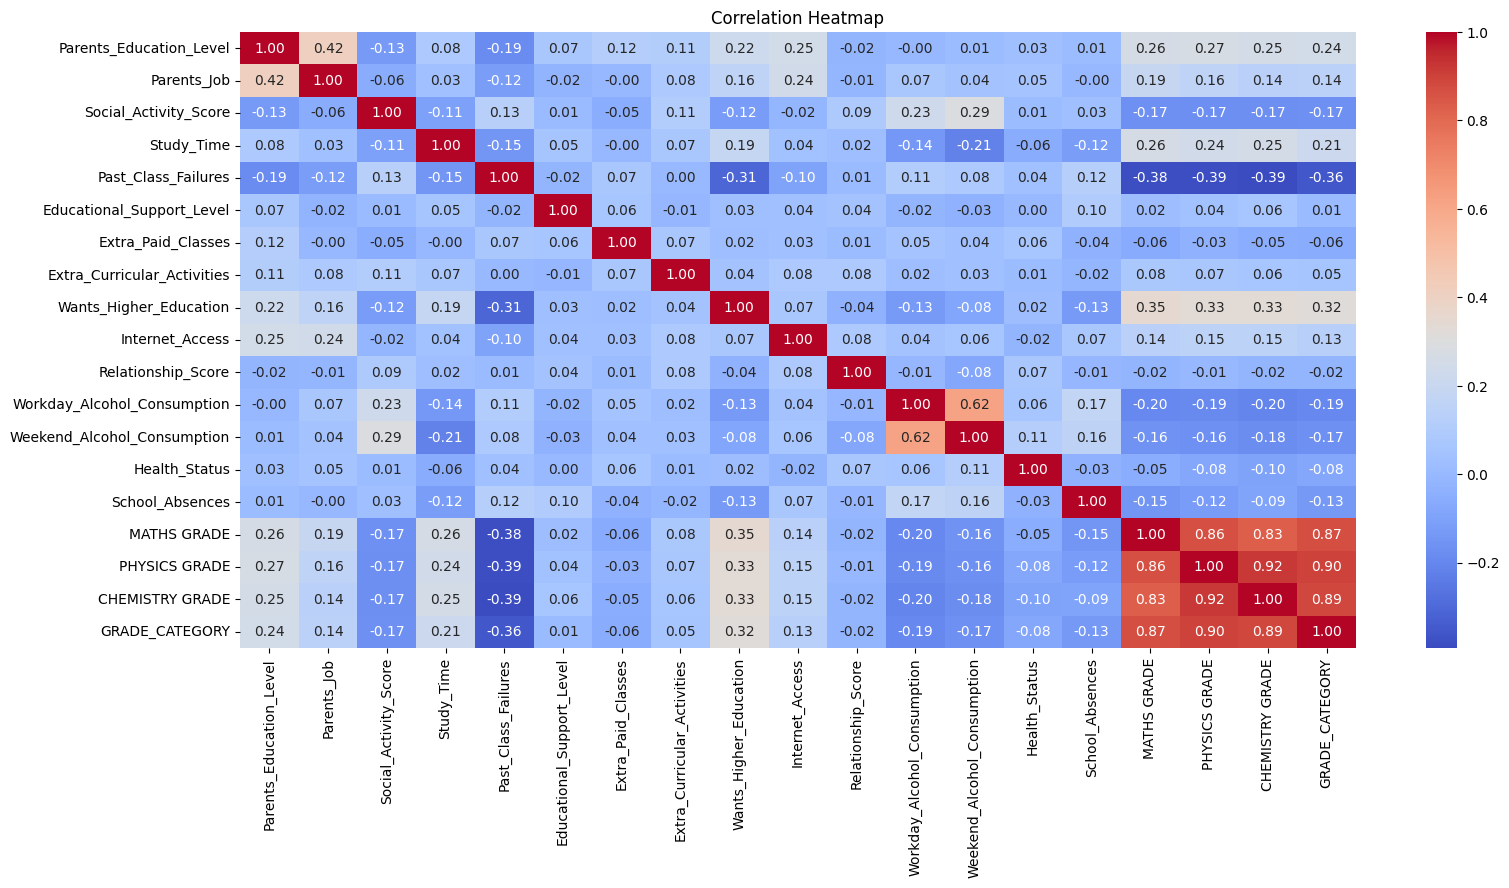

In [ ]:
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Distribution of Grades: Maths, Physics, Chemistry, and Grade Category**







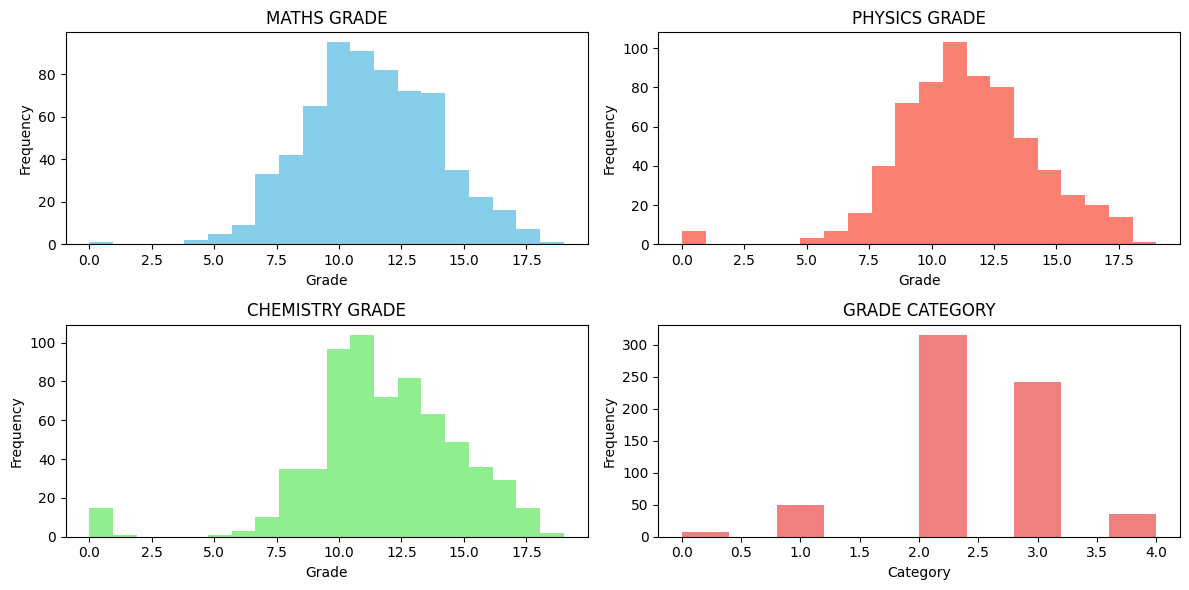

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for each grade column
plt.figure(figsize=(12, 6))

# Plot MATHS GRADE
plt.subplot(2, 2, 1)
plt.hist(df_performance['MATHS GRADE'], bins=20, color='skyblue')
plt.title('MATHS GRADE')
plt.xlabel('Grade')
plt.ylabel('Frequency')

# Plot PHYSICS GRADE
plt.subplot(2, 2, 2)
plt.hist(df_performance['PHYSICS GRADE'], bins=20, color='salmon')
plt.title('PHYSICS GRADE')
plt.xlabel('Grade')
plt.ylabel('Frequency')

# Plot CHEMISTRY GRADE
plt.subplot(2, 2, 3)
plt.hist(df_performance['CHEMISTRY GRADE'], bins=20, color='lightgreen')
plt.title('CHEMISTRY GRADE')
plt.xlabel('Grade')
plt.ylabel('Frequency')


# Plot GRADE_CATEGORY
plt.subplot(2, 2, 4)
plt.hist(df_performance['GRADE_CATEGORY'], color='lightcoral')
plt.title('GRADE CATEGORY')
plt.xlabel('Category')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Grade Category Distribution: Proportions of Each Grade**

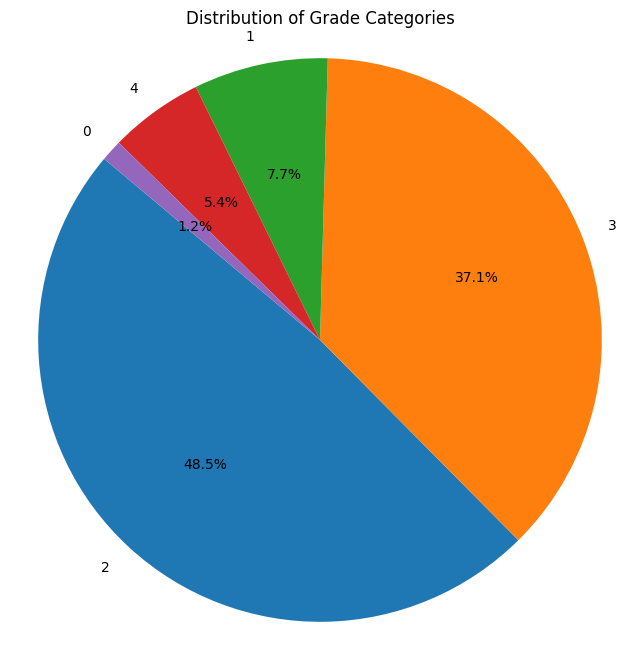

In [ ]:
# Count the occurrences of each grade category
grade_counts = df_performance['GRADE_CATEGORY'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Grade Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

**Distribution of Grades by Grade Type and Higher Education Preference**

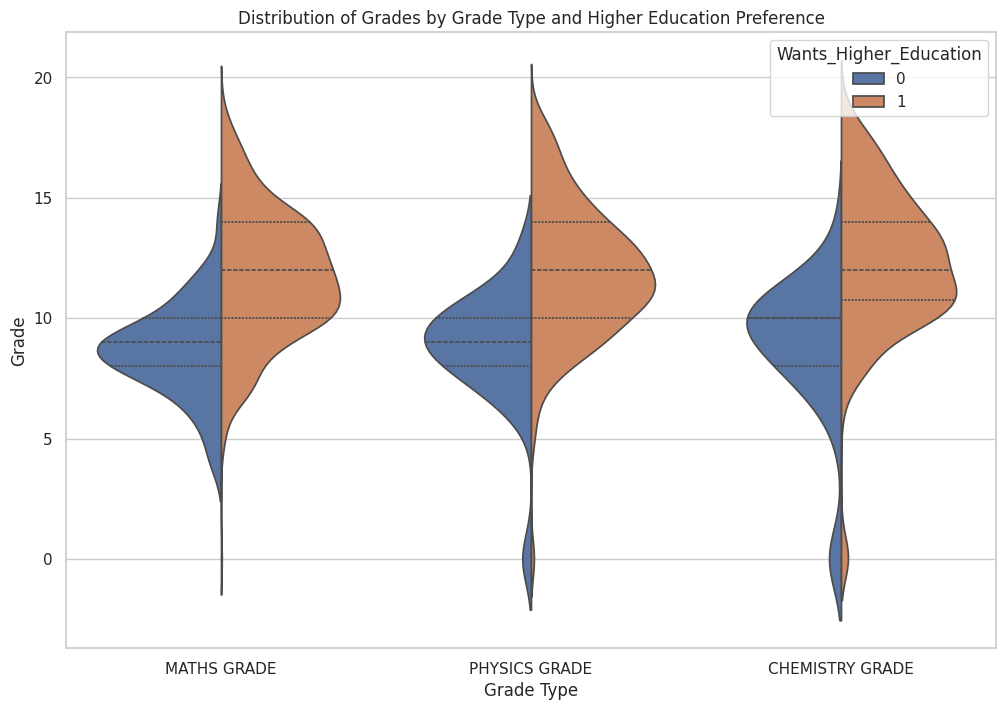

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Define the data for the violin plot
data = df_performance[['MATHS GRADE', 'PHYSICS GRADE', 'CHEMISTRY GRADE','Wants_Higher_Education']]

# Melt the DataFrame to long format for easier plotting
data_melted = data.melt(id_vars='Wants_Higher_Education', var_name='Grade Type', value_name='Grade')

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Grade Type', y='Grade', hue='Wants_Higher_Education', data=data_melted, split=True, inner='quartile')
plt.title('Distribution of Grades by Grade Type and Higher Education Preference')
plt.xlabel('Grade Type')
plt.ylabel('Grade')
plt.show()


**Scatter Plot of Past Class Failures vs. Grade Category**

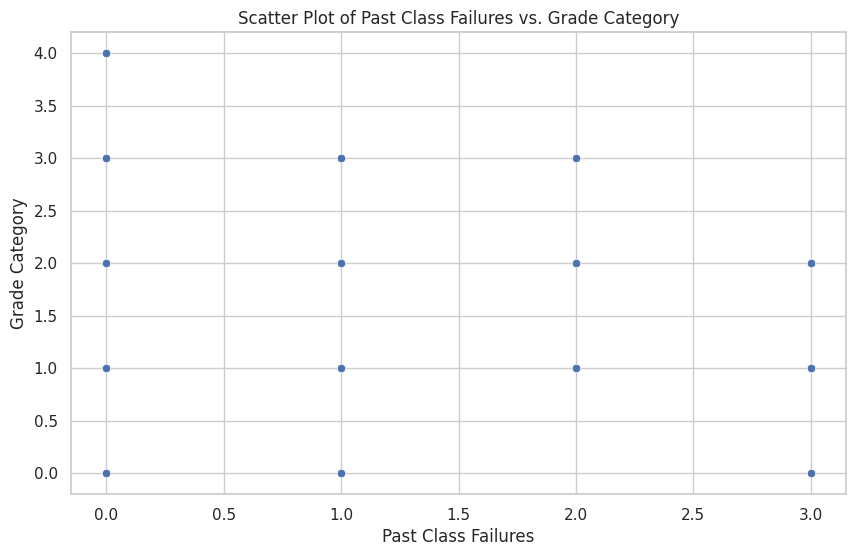

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Past_Class_Failures', y='GRADE_CATEGORY', data=df_performance)
plt.title('Scatter Plot of Past Class Failures vs. Grade Category')
plt.xlabel('Past Class Failures')
plt.ylabel('Grade Category')
plt.show()


**Comparison of 'MATHS' 'PHYSICS' 'CHEMISTRY' Grades and Grade Category with Past Class Failures**

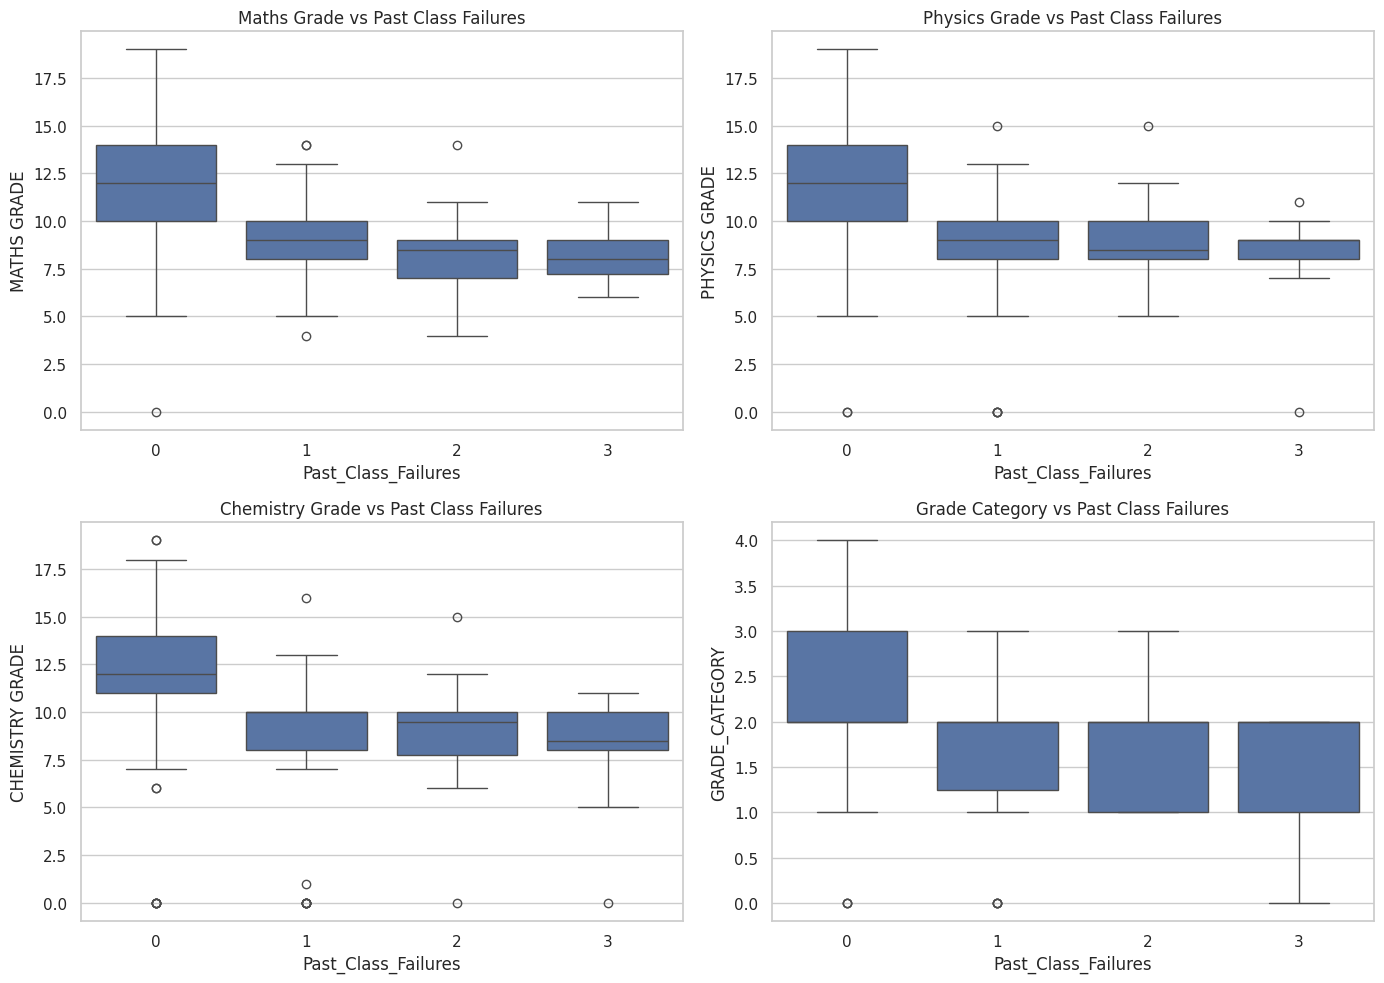

In [ ]:
# Set up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Box plot for Maths Grade vs Past Class Failures
sns.boxplot(x='Past_Class_Failures', y='MATHS GRADE', data=df_performance, ax=axs[0, 0])
axs[0, 0].set_title('Maths Grade vs Past Class Failures')

# Box plot for Physics Grade vs Past Class Failures
sns.boxplot(x='Past_Class_Failures', y='PHYSICS GRADE', data=df_performance, ax=axs[0, 1])
axs[0, 1].set_title('Physics Grade vs Past Class Failures')

# Box plot for Chemistry Grade vs Past Class Failures
sns.boxplot(x='Past_Class_Failures', y='CHEMISTRY GRADE', data=df_performance, ax=axs[1, 0])
axs[1, 0].set_title('Chemistry Grade vs Past Class Failures')

# Box plot for Grade Category vs Past Class Failures
sns.boxplot(x='Past_Class_Failures', y='GRADE_CATEGORY', data=df_performance, ax=axs[1, 1])
axs[1, 1].set_title('Grade Category vs Past Class Failures')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Effect of Workday Alcohol Consumption on Grade Category: Scatter Plot and Box Plot**

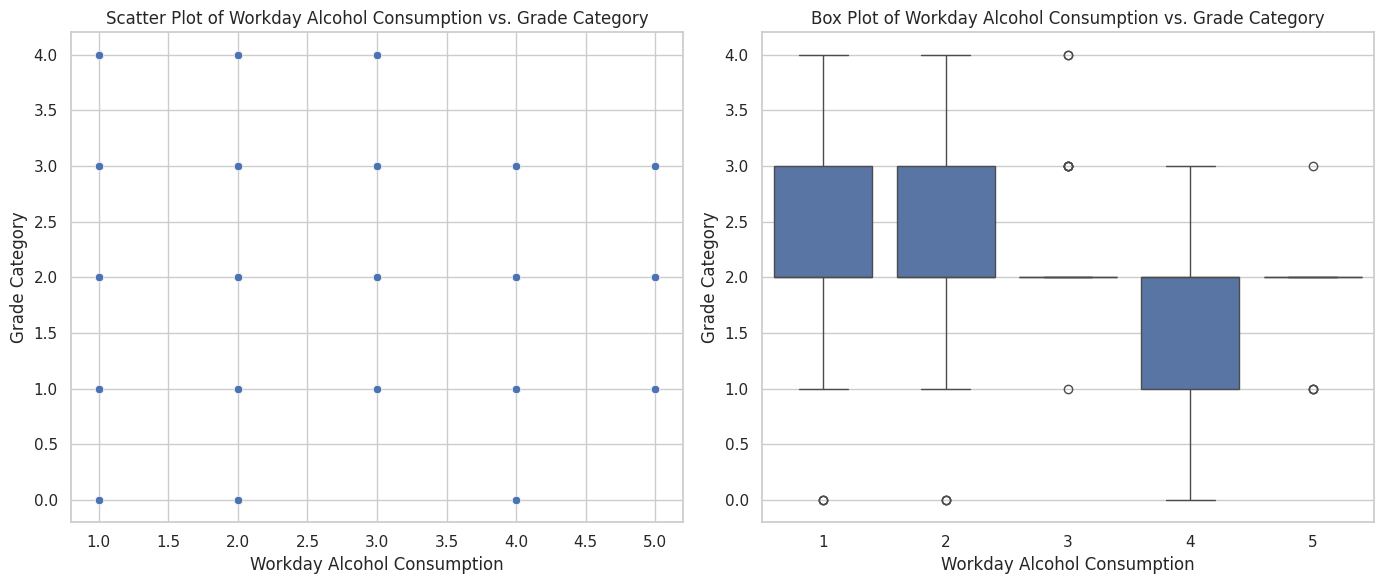

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter Plot
sns.scatterplot(x='Workday_Alcohol_Consumption', y='GRADE_CATEGORY', data=df_performance, ax=axs[0])
axs[0].set_title('Scatter Plot of Workday Alcohol Consumption vs. Grade Category')
axs[0].set_xlabel('Workday Alcohol Consumption')
axs[0].set_ylabel('Grade Category')

# Box Plot
sns.boxplot(x='Workday_Alcohol_Consumption', y='GRADE_CATEGORY', data=df_performance, ax=axs[1])
axs[1].set_title('Box Plot of Workday Alcohol Consumption vs. Grade Category')
axs[1].set_xlabel('Workday Alcohol Consumption')
axs[1].set_ylabel('Grade Category')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


**Effect of Weekend Alcohol Consumption on Grade Category: Scatter Plot and Box Plot**

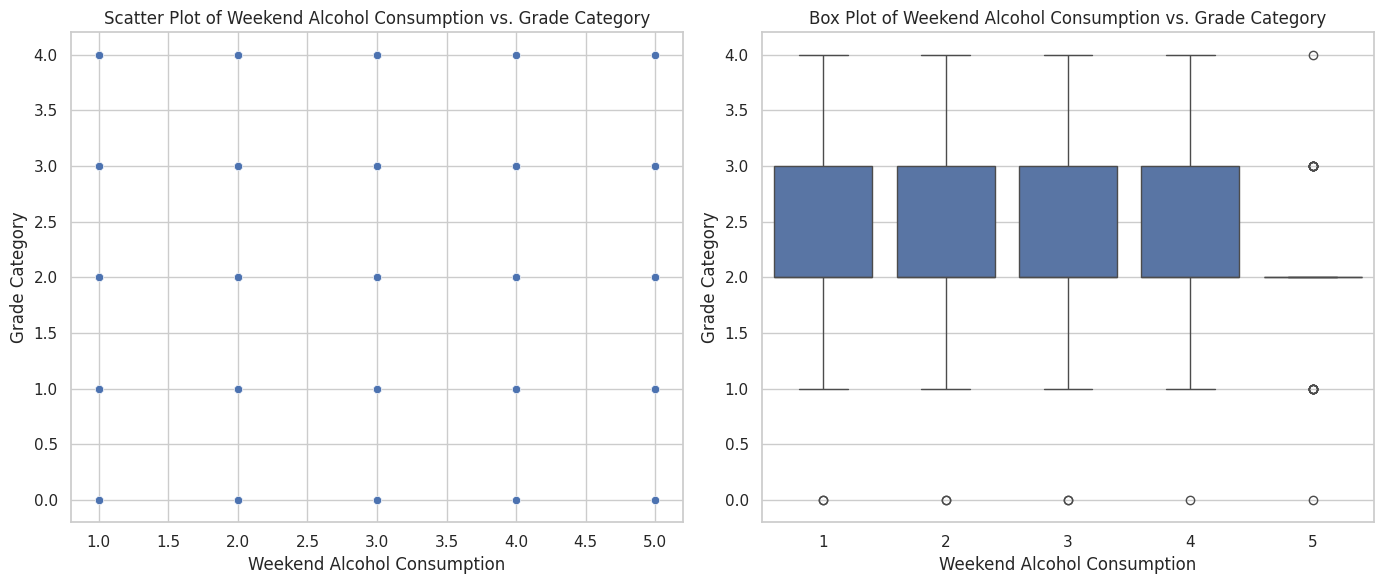

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter Plot
sns.scatterplot(x='Weekend_Alcohol_Consumption', y='GRADE_CATEGORY', data=df_performance, ax=axs[0])
axs[0].set_title('Scatter Plot of Weekend Alcohol Consumption vs. Grade Category')
axs[0].set_xlabel('Weekend Alcohol Consumption')
axs[0].set_ylabel('Grade Category')

# Box Plot
sns.boxplot(x='Weekend_Alcohol_Consumption', y='GRADE_CATEGORY', data=df_performance, ax=axs[1])
axs[1].set_title('Box Plot of Weekend Alcohol Consumption vs. Grade Category')
axs[1].set_xlabel('Weekend Alcohol Consumption')
axs[1].set_ylabel('Grade Category')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

**Comparison of Workday and Weekend Alcohol Consumption by Grade Category**

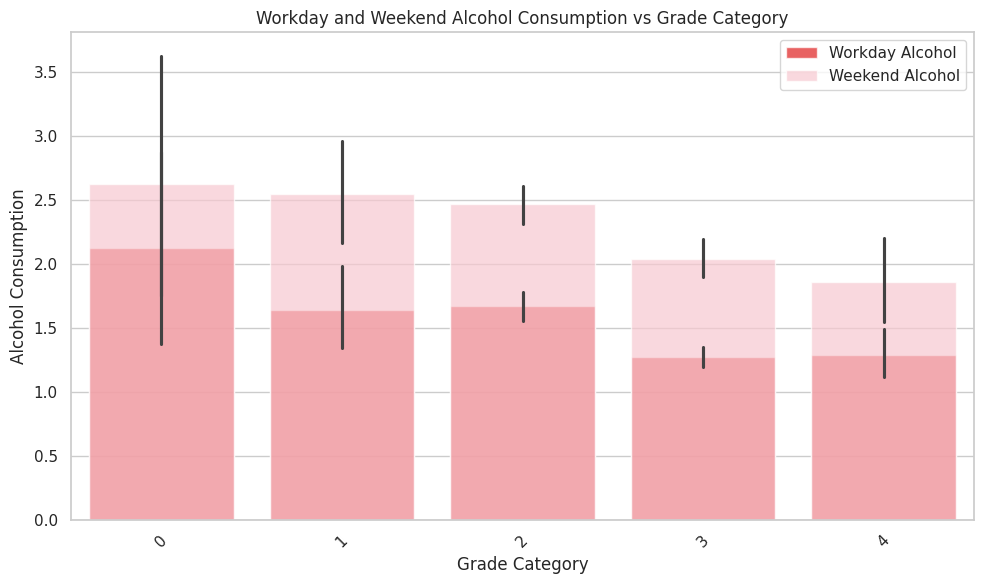

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Grouped bar chart
plt.figure(figsize=(10, 6))

# Grouped bar chart for Workday Alcohol Consumption vs Grade Category
sns.barplot(x='GRADE_CATEGORY', y='Workday_Alcohol_Consumption', data=df_performance, color='red', alpha=0.7, label='Workday Alcohol')

# Grouped bar chart for Weekend Alcohol Consumption vs Grade Category
sns.barplot(x='GRADE_CATEGORY', y='Weekend_Alcohol_Consumption', data=df_performance, color='pink', alpha=0.7, label='Weekend Alcohol')

plt.title('Workday and Weekend Alcohol Consumption vs Grade Category')
plt.xlabel('Grade Category')
plt.ylabel('Alcohol Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


** relationship between study time and grades in different subjects, as well as the distribution of study time across different grade categories.**

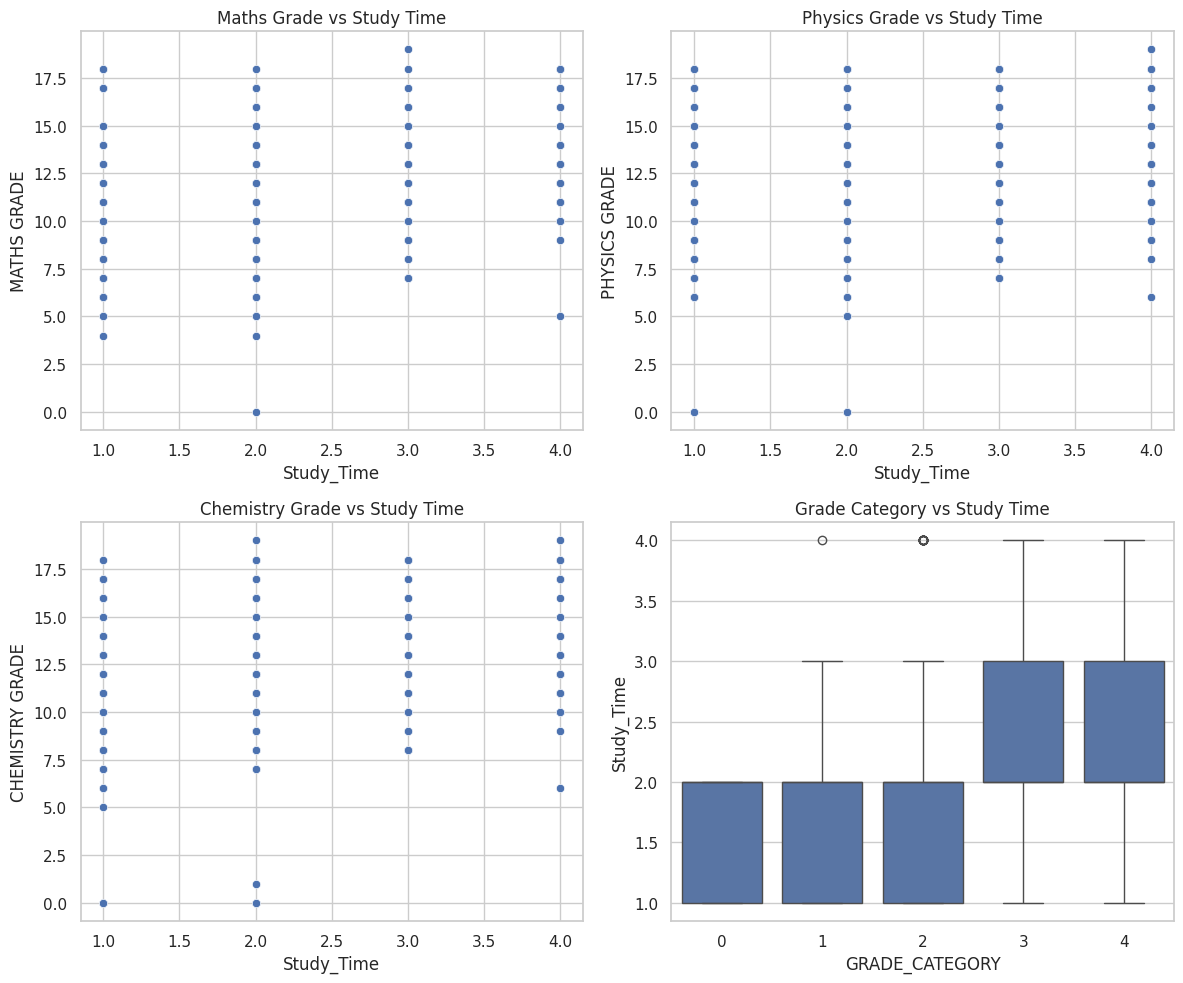

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plots for each subject grade vs study time
sns.scatterplot(x='Study_Time', y='MATHS GRADE', data=df_performance, ax=axs[0, 0])
axs[0, 0].set_title('Maths Grade vs Study Time')

sns.scatterplot(x='Study_Time', y='PHYSICS GRADE', data=df_performance, ax=axs[0, 1])
axs[0, 1].set_title('Physics Grade vs Study Time')

sns.scatterplot(x='Study_Time', y='CHEMISTRY GRADE', data=df_performance, ax=axs[1, 0])
axs[1, 0].set_title('Chemistry Grade vs Study Time')

# Box plot for Grade Category vs Study Time
sns.boxplot(x='GRADE_CATEGORY', y='Study_Time', data=df_performance, ax=axs[1, 1])
axs[1, 1].set_title('Grade Category vs Study Time')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**Distribution of Grades overall and subject wise**

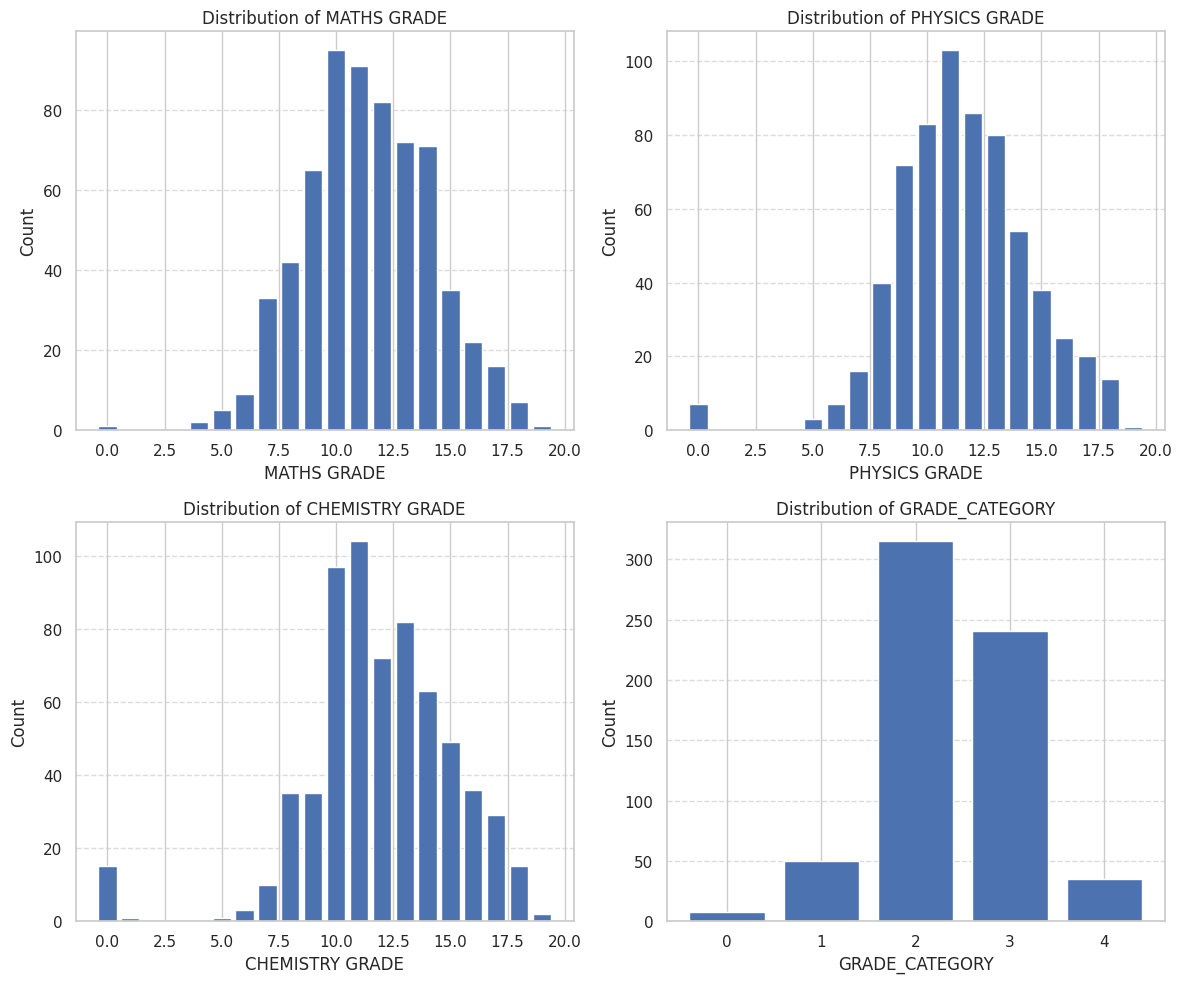

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the columns of interest
columns_of_interest = ['MATHS GRADE', 'PHYSICS GRADE', 'CHEMISTRY GRADE', 'GRADE_CATEGORY']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Iterate over each grade and create bar plots in each subplot
for i, grade in enumerate(columns_of_interest):
    # Get the unique values and their counts
    unique_values, value_counts = np.unique(df_performance[grade], return_counts=True)

    # Plot the bar graph in the current subplot
    axs[i].bar(unique_values, value_counts)
    axs[i].set_xlabel(grade)
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Distribution of {grade}')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


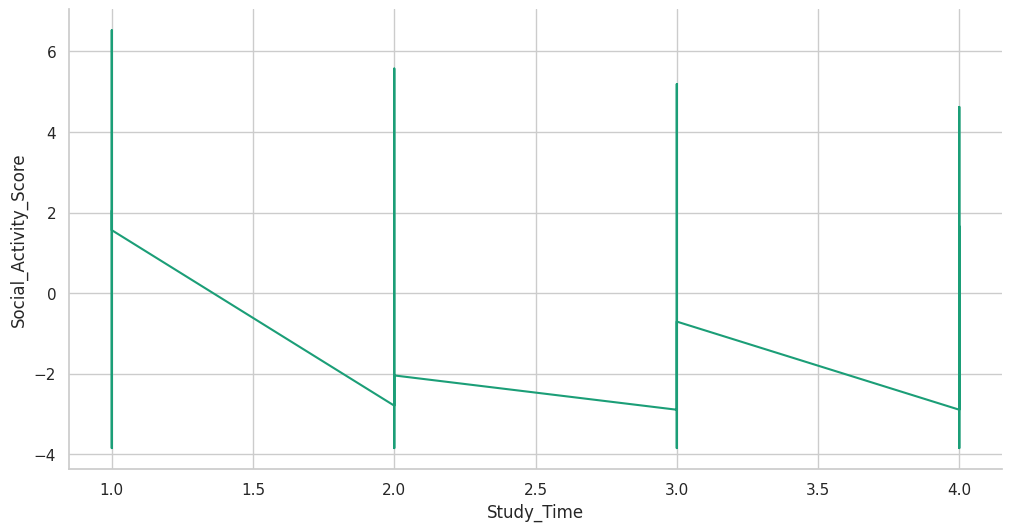

In [ ]:
# @title Study_Time vs Social_Activity_Score

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Study_Time']
  ys = series['Social_Activity_Score']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_performance.sort_values('Study_Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Study_Time')
_ = plt.ylabel('Social_Activity_Score')

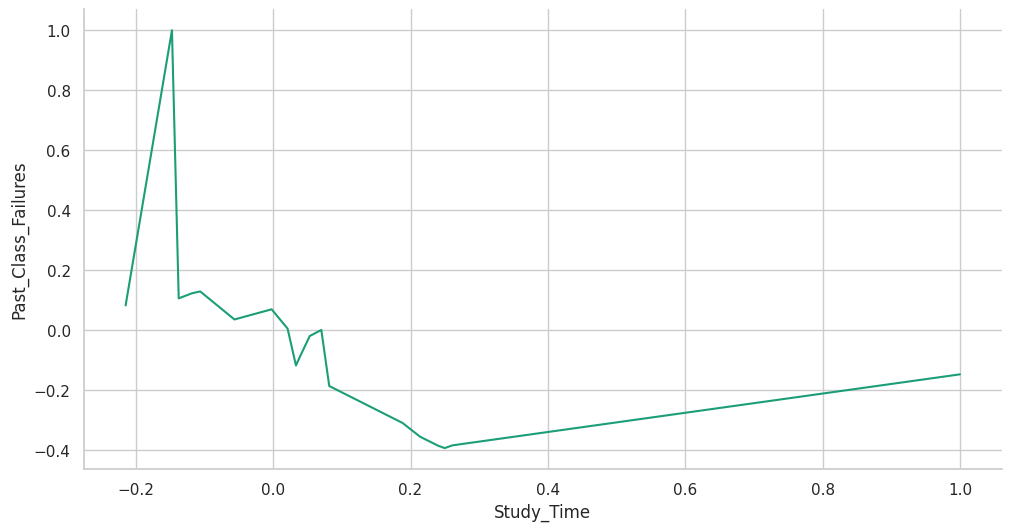

In [ ]:
# @title Study_Time vs Past_Class_Failures

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Study_Time']
  ys = series['Past_Class_Failures']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = correlation_matrix.sort_values('Study_Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Study_Time')
_ = plt.ylabel('Past_Class_Failures')

**"Average Grades by Past Class Failures"**

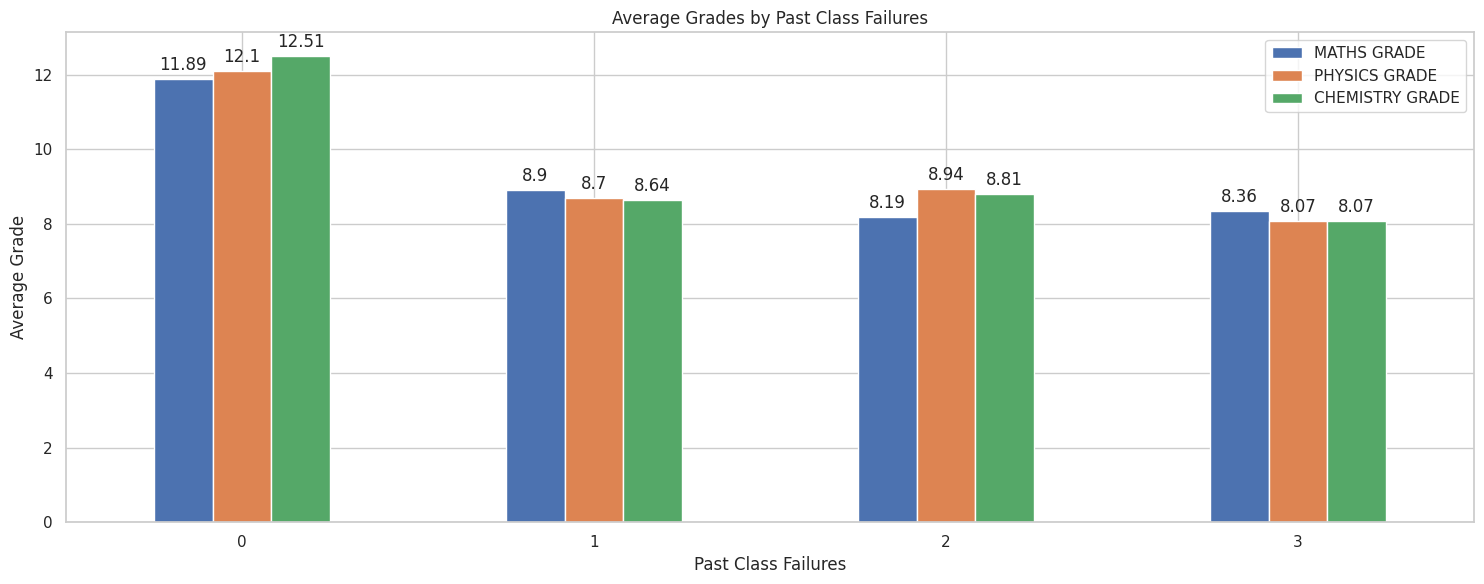

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Past_Class_Failures' and calculate the mean grade for each group
grades_by_failures = df_performance.groupby('Past_Class_Failures')[['MATHS GRADE', 'PHYSICS GRADE', 'CHEMISTRY GRADE']].mean()

# Plotting
ax = grades_by_failures.plot(kind='bar', figsize=(15, 6))

# Adding labels and title
plt.xlabel('Past Class Failures')
plt.ylabel('Average Grade')
plt.title('Average Grades by Past Class Failures')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()




**"Distribution of School Absences Across Grade Categories"**

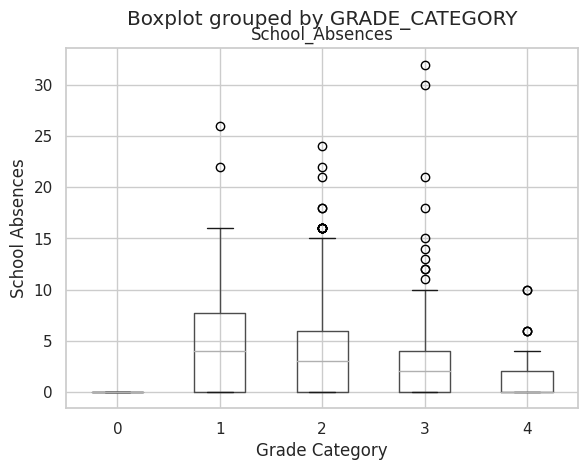

In [ ]:
import matplotlib.pyplot as plt
df_performance.boxplot('School_Absences', by='GRADE_CATEGORY')
plt.xlabel('Grade Category')
_ = plt.ylabel('School Absences')

<Axes: xlabel='GRADE_CATEGORY', ylabel='Parents_Education_Level'>

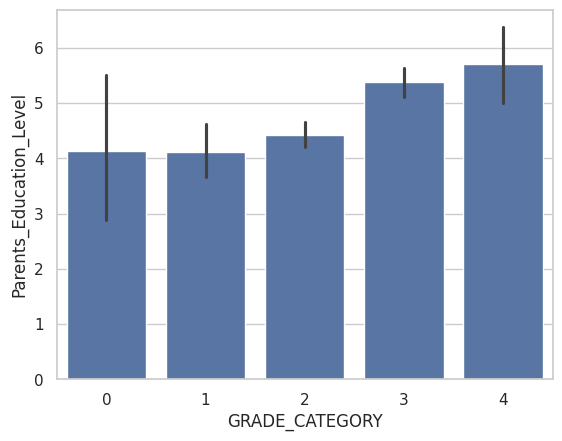

In [ ]:
# @title Grade category by parental education level

sns.barplot(x = 'GRADE_CATEGORY', y = 'Parents_Education_Level', data = df_performance)

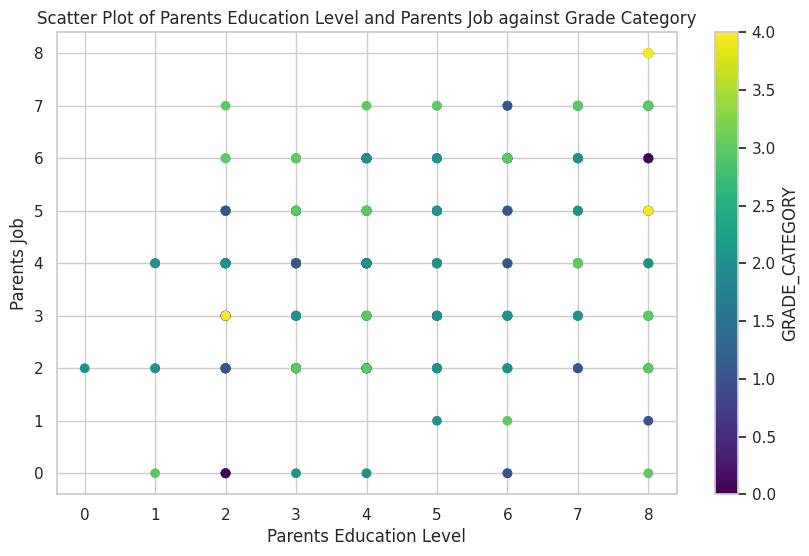

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_performance['Parents_Education_Level'], df_performance['Parents_Job'], c=df_performance['GRADE_CATEGORY'], cmap='viridis')
plt.colorbar(label='GRADE_CATEGORY')
plt.xlabel('Parents Education Level')
plt.ylabel('Parents Job')
plt.title('Scatter Plot of Parents Education Level and Parents Job against Grade Category')
plt.show()



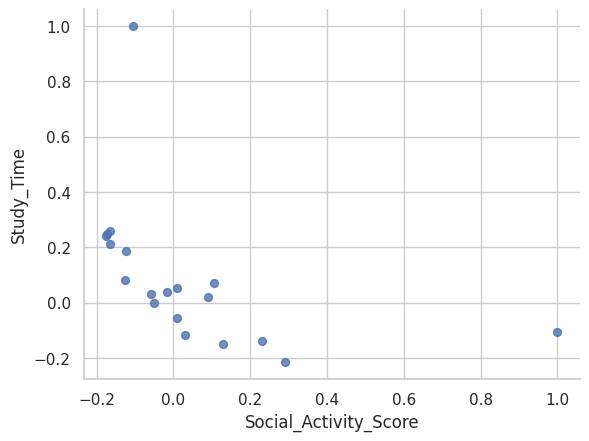

In [ ]:
# @title Social_Activity_Score vs Study_Time

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='Social_Activity_Score', y='Study_Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

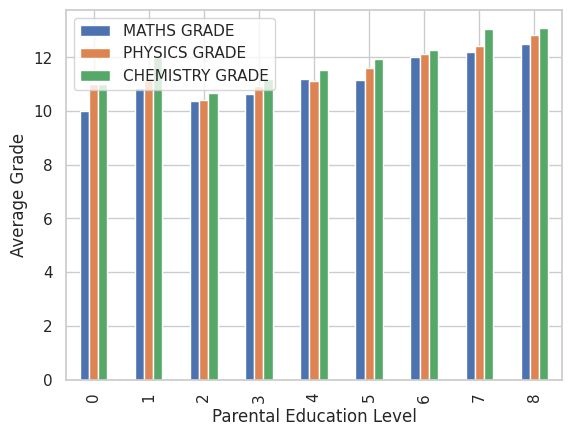

In [ ]:
# @title Grade by Subject and Parental Education

import matplotlib.pyplot as plt
df_performance.groupby('Parents_Education_Level')[['MATHS GRADE', 'PHYSICS GRADE', 'CHEMISTRY GRADE']].mean().plot(kind='bar')
plt.xlabel('Parental Education Level')
_ = plt.ylabel('Average Grade')

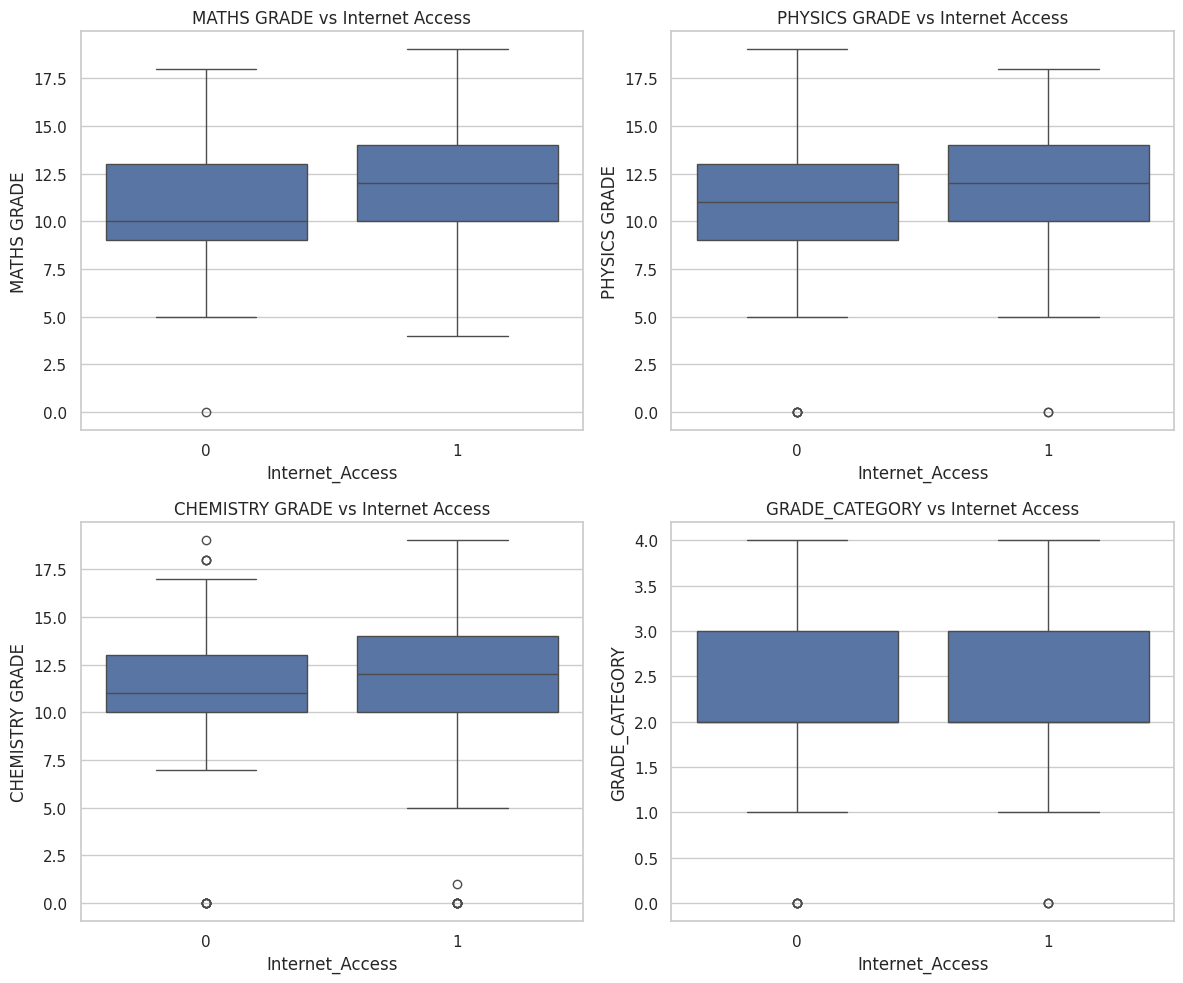

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot graphs
sns.boxplot(x='Internet_Access', y='MATHS GRADE', data=df_performance, ax=axs[0, 0])
axs[0, 0].set_title('MATHS GRADE vs Internet Access')

sns.boxplot(x='Internet_Access', y='PHYSICS GRADE', data=df_performance, ax=axs[0, 1])
axs[0, 1].set_title('PHYSICS GRADE vs Internet Access')

sns.boxplot(x='Internet_Access', y='CHEMISTRY GRADE', data=df_performance, ax=axs[1, 0])
axs[1, 0].set_title('CHEMISTRY GRADE vs Internet Access')

sns.boxplot(x='Internet_Access', y='GRADE_CATEGORY', data=df_performance, ax=axs[1, 1])
axs[1, 1].set_title('GRADE_CATEGORY vs Internet Access')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
df_performance

,Parents_Education_Level,Parents_Job,Social_Activity_Score,Study_Time,Past_Class_Failures,Educational_Support_Level,Extra_Paid_Classes,Extra_Curricular_Activities,Wants_Higher_Education,Internet_Access,Relationship_Score,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Health_Status,School_Absences,MATHS GRADE,PHYSICS GRADE,CHEMISTRY GRADE,GRADE_CATEGORY
0,8,4,1.098856,2,0,2,0,0,1,0,-0.690890,1,1,3,4,0,11,11,1
1,2,2,-1.089059,2,0,2,0,0,1,1,0.356252,1,1,3,2,9,11,11,2
2,2,2,-1.940224,2,0,2,0,0,1,1,-0.690890,2,3,3,6,12,13,12,3
3,6,4,-2.892349,3,0,2,0,1,1,1,0.335228,1,1,5,0,14,14,14,3
4,6,4,-1.940224,2,0,2,0,0,1,0,-0.690890,1,2,5,0,11,13,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,5,5,-0.988099,3,1,1,0,1,1,1,0.356252,1,2,5,4,10,11,10,2
645,4,7,-0.237893,2,0,2,0,0,1,1,-0.690890,1,1,1,4,15,15,16,3
646,2,4,-3.358889,2,0,1,0,1,1,0,-3.832316,1,1,5,6,11,12,9,2
647,4,6,2.902147,1,0,1,0,0,1,1,-2.785174,3,4,2,6,10,10,10,2
